In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [25]:
np.random.seed(42)
X = np.linspace(-3, 3 , 30)
Y_true = X**2
noise = np.random.normal(0, 1, 30)
y = Y_true + noise

In [26]:
X

array([-3.        , -2.79310345, -2.5862069 , -2.37931034, -2.17241379,
       -1.96551724, -1.75862069, -1.55172414, -1.34482759, -1.13793103,
       -0.93103448, -0.72413793, -0.51724138, -0.31034483, -0.10344828,
        0.10344828,  0.31034483,  0.51724138,  0.72413793,  0.93103448,
        1.13793103,  1.34482759,  1.55172414,  1.75862069,  1.96551724,
        2.17241379,  2.37931034,  2.5862069 ,  2.79310345,  3.        ])

In [27]:
y

array([ 9.49671415,  7.66316257,  7.33615465,  7.18414757,  4.48522831,
        3.62912107,  4.67195955,  3.17528253,  1.33908685,  1.83744708,
        0.40340752,  0.05864599,  0.50950092, -1.81696633, -1.71421629,
       -0.55158598, -0.91651721,  0.58178598, -0.38364833, -0.54547849,
        2.76053581,  1.58278494,  2.475376  ,  1.66799854,  3.3188753 ,
        4.83030428,  4.51012414,  7.06416413,  7.20078818,  8.70830625])

In [28]:
np.linspace(1, 100 , 10)

array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.])

In [29]:
data = pd.DataFrame({'X':X, 'y':y})

In [30]:
data

,X,y
0,-3.000000,9.496714
1,-2.793103,7.663163
2,-2.586207,7.336155
3,-2.379310,7.184148
4,-2.172414,4.485228
5,-1.965517,3.629121
6,-1.758621,4.671960
7,-1.551724,3.175283
8,-1.344828,1.339087
9,-1.137931,1.837447


In [217]:
train_X, test_X, train_y, test_y = train_test_split(data['X'], data['y'], test_size=0.3, random_state=42)

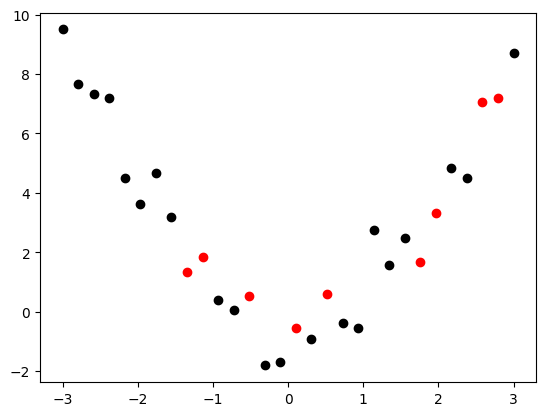

In [218]:
plt.scatter(train_X, train_y, color = 'black')
plt.scatter(test_X, test_y, color = 'red')
plt.show()

In [219]:
1. gather the data
2. data preprocessing.  = Code
3. ML Model.            = model pickle
4. Model prediction


Deployement
1. Load Model pickle.   =.   model pickle
2. Get the test data
3. preprocess the test data.    = preprocess code
4. pass this preprocessed test data to the loaded model


Pipeline

Pickle (Preprocessed code + Model )


test data -> piple pickle (preprocess+ prediction)

SyntaxError: invalid syntax (ipython-input-4040366480.py, line 1)

In [263]:
pipe = make_pipeline(PolynomialFeatures(degree=14), LinearRegression())
pipe.fit(train_X.values.reshape(-1,1), train_y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=14)),
                ('linearregression', LinearRegression())])

In [264]:
pipe.named_steps['polynomialfeatures'].get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14'], dtype=object)

In [265]:
pipe.named_steps['linearregression'].intercept_

np.float64(-1.4570883790171445)

In [266]:
pipe.named_steps['linearregression'].coef_

array([ 0.00000000e+00,  1.00068939e+00,  1.26745580e-01, -3.46162221e+00,
        4.58112139e+00,  3.79776264e+00, -2.81994193e+00, -2.01330962e+00,
        5.62581564e-01,  5.23404184e-01, -9.01892955e-03, -6.34418822e-02,
       -7.96795948e-03,  2.82670927e-03,  5.79149375e-04])

In [267]:
linearreg_coef = pipe.named_steps['linearregression'].coef_

<BarContainer object of 15 artists>

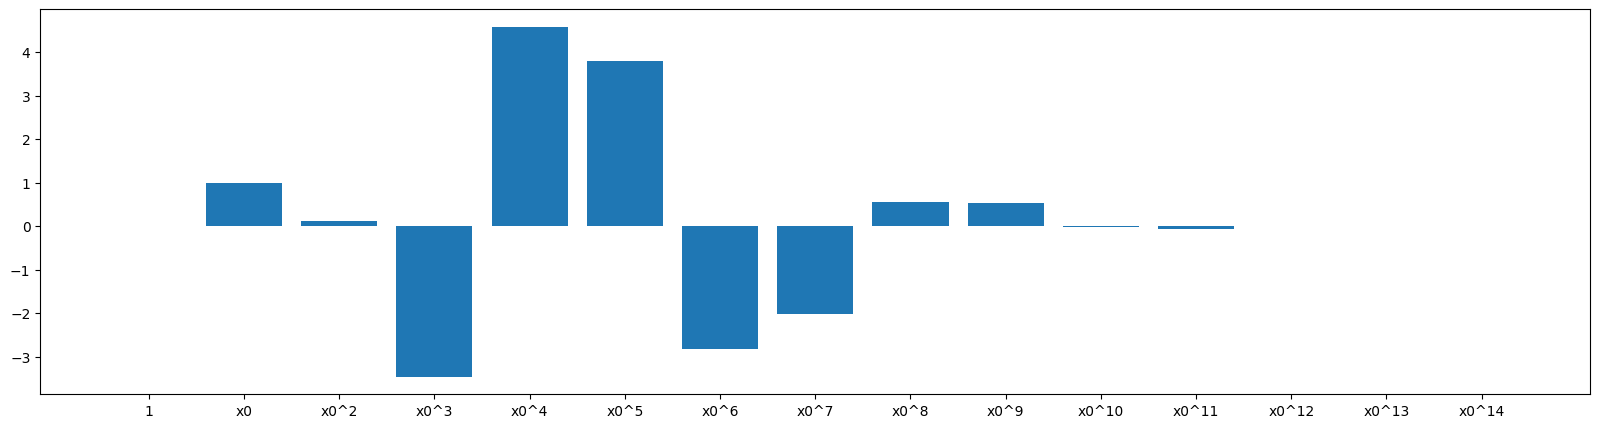

In [268]:
plt.figure(figsize=(20,5))
plt.bar(pipe.named_steps['polynomialfeatures'].get_feature_names_out(), pipe.named_steps['linearregression'].coef_)

In [269]:
train_predict = pipe.predict(train_X.values.reshape(-1,1))
test_predict = pipe.predict(test_X.values.reshape(-1,1))

In [270]:
mean_absolute_percentage_error(train_y, train_predict)

0.6786809898214992

In [271]:
mean_absolute_percentage_error(test_y, test_predict)

2.004865145805538

In [272]:
r2_score(train_y, train_predict)

0.9771401898297858

In [273]:
r2_score(test_y, test_predict)

-35.37066387031944

In [274]:
mean_squared_error(train_y, train_predict)

0.2671551719361518

In [275]:
mean_squared_error(test_y, test_predict)

254.62677026283538

In [276]:
print("Overfitted Model train MSE : ", mean_squared_error(train_y, train_predict))
print("Overfitted Model test MSE : ", mean_squared_error(test_y, test_predict))


Overfitted Model train MSE :  0.2671551719361518
Overfitted Model test MSE :  254.62677026283538


In [277]:
X_plot = data['X'].values
Y_plot = pipe.predict(X_plot.reshape(-1,1))

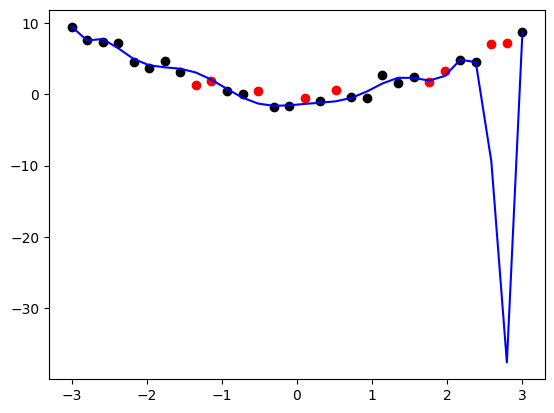

In [278]:
plt.scatter(train_X, train_y, color = 'black')
plt.scatter(test_X, test_y, color = 'red')
plt.plot(X_plot, Y_plot, color = 'blue')

# Ridge Regression

In [279]:
pipe_ridge = make_pipeline(PolynomialFeatures(degree=14), Ridge(alpha = 10))
pipe_ridge.fit(train_X.values.reshape(-1,1), train_y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=14)),
                ('ridge', Ridge(alpha=10))])

In [280]:
train_predict = pipe_ridge.predict(train_X.values.reshape(-1,1))
test_predict = pipe_ridge.predict(test_X.values.reshape(-1,1))

In [281]:
print("Overfitted Model train MSE : ", mean_squared_error(train_y, train_predict))
print("Overfitted Model test MSE : ", mean_squared_error(test_y, test_predict))

Overfitted Model train MSE :  0.544806373765014
Overfitted Model test MSE :  6.328027750551889


In [282]:
#GridSearch ->

In [283]:
ridge_coef_ = pipe_ridge.named_steps['ridge'].coef_

<BarContainer object of 15 artists>

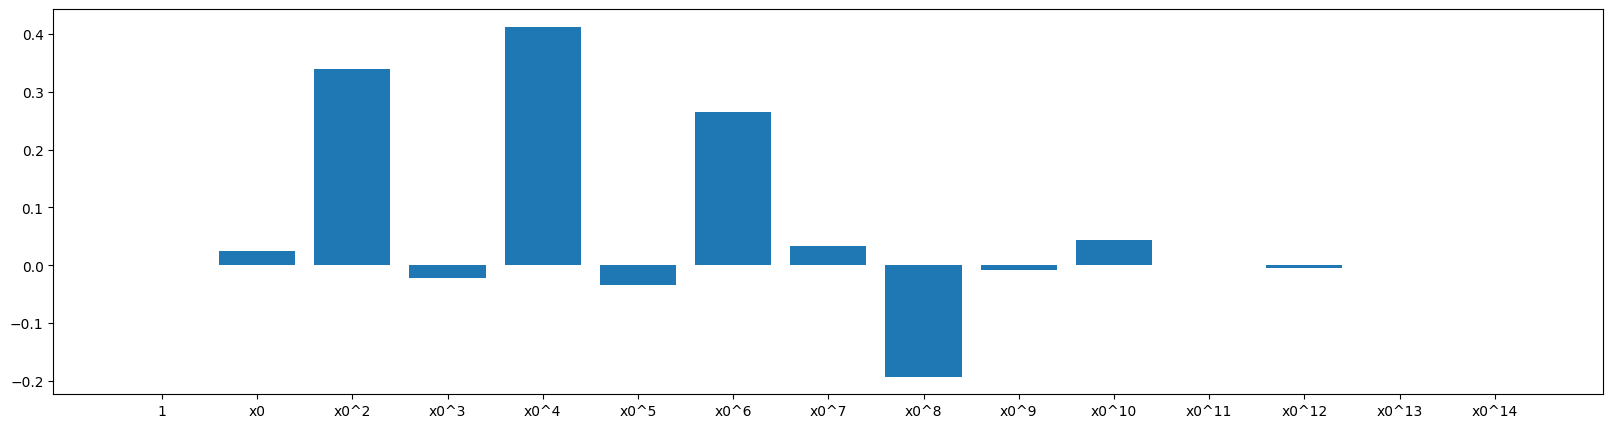

In [284]:
plt.figure(figsize=(20,5))
plt.bar(pipe_ridge.named_steps['polynomialfeatures'].get_feature_names_out(), pipe_ridge.named_steps['ridge'].coef_)

In [285]:
pipe_ridge.named_steps

{'polynomialfeatures': PolynomialFeatures(degree=14), 'ridge': Ridge(alpha=10)}

# Lasso Regression

In [286]:
pipe_lasso = make_pipeline(PolynomialFeatures(degree=14), Lasso(alpha = 10))
pipe_lasso.fit(train_X.values.reshape(-1,1), train_y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=14)),
                ('lasso', Lasso(alpha=10))])

In [287]:
train_predict = pipe_lasso.predict(train_X.values.reshape(-1,1))
test_predict = pipe_lasso.predict(test_X.values.reshape(-1,1))

In [288]:
print("Overfitted Model train MSE : ", mean_squared_error(train_y, train_predict))
print("Overfitted Model test MSE : ", mean_squared_error(test_y, test_predict))

Overfitted Model train MSE :  2.01450962576938
Overfitted Model test MSE :  0.48090648810296366


In [289]:
lasso_coef_ = pipe_lasso.named_steps['lasso'].coef_

<BarContainer object of 15 artists>

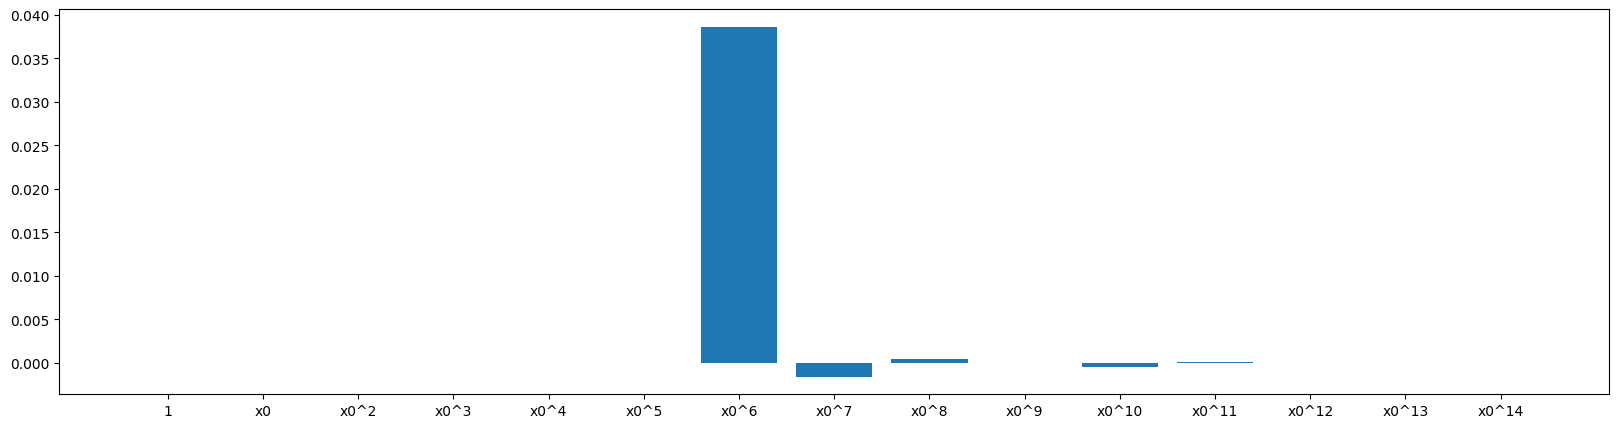

In [290]:
plt.figure(figsize=(20,5))
plt.bar(pipe_lasso.named_steps['polynomialfeatures'].get_feature_names_out(), pipe_lasso.named_steps['lasso'].coef_)

# ElasticNet Regression

In [291]:
pipe_elasticnet = make_pipeline(PolynomialFeatures(degree=14), ElasticNet(alpha = 10, l1_ratio=0.5))
pipe_elasticnet.fit(train_X.values.reshape(-1,1), train_y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=14)),
                ('elasticnet', ElasticNet(alpha=10))])

In [292]:
train_predict = pipe_elasticnet.predict(train_X.values.reshape(-1,1))
test_predict = pipe_elasticnet.predict(test_X.values.reshape(-1,1))

In [293]:
print("Overfitted Model train MSE : ", mean_squared_error(train_y, train_predict))
print("Overfitted Model test MSE : ", mean_squared_error(test_y, test_predict))

Overfitted Model train MSE :  1.749018247934349
Overfitted Model test MSE :  0.4017786654325899


In [294]:
elasticnet_coef_ = pipe_elasticnet.named_steps['elasticnet'].coef_

<BarContainer object of 15 artists>

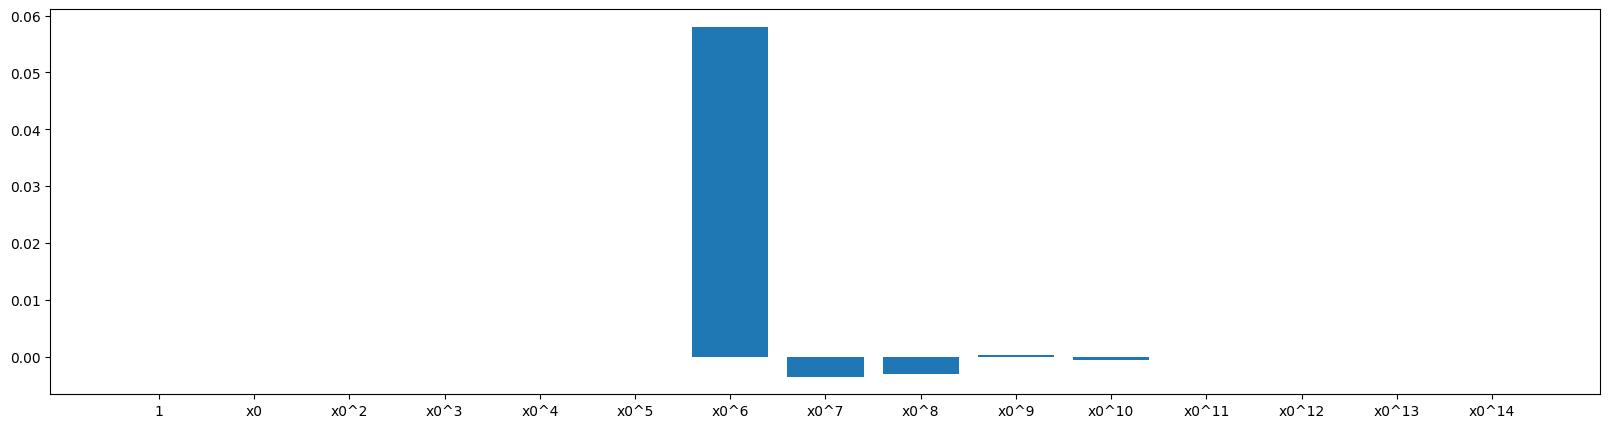

In [295]:
plt.figure(figsize=(20,5))
plt.bar(pipe_elasticnet.named_steps['polynomialfeatures'].get_feature_names_out(), pipe_elasticnet.named_steps['elasticnet'].coef_)

In [296]:
feature_name = pipe_elasticnet.named_steps['polynomialfeatures'].get_feature_names_out()

In [297]:
linearreg_coef, ridge_coef_, lasso_coef_, elasticnet_coef_

(array([ 0.00000000e+00,  1.00068939e+00,  1.26745580e-01, -3.46162221e+00,
         4.58112139e+00,  3.79776264e+00, -2.81994193e+00, -2.01330962e+00,
         5.62581564e-01,  5.23404184e-01, -9.01892955e-03, -6.34418822e-02,
        -7.96795948e-03,  2.82670927e-03,  5.79149375e-04]),
 array([ 0.00000000e+00,  2.49086683e-02,  3.39897298e-01, -2.25704632e-02,
         4.12317744e-01, -3.34188772e-02,  2.64282333e-01,  3.41741900e-02,
        -1.92699902e-01, -7.97531389e-03,  4.44689032e-02,  4.14903181e-04,
        -4.59238329e-03,  1.06701700e-05,  1.79727521e-04]),
 array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  3.85945114e-02, -1.60392746e-03,
         4.23243414e-04, -0.00000000e+00, -5.15827882e-04,  4.42908686e-05,
        -8.59441973e-06, -2.86489079e-06,  2.55938151e-06]),
 array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  5.80228021e-02

In [298]:
pd.DataFrame({'feature_name':feature_name, 'linearreg_coef':linearreg_coef, 'ridge_coef_':ridge_coef_, 'lasso_coef_':lasso_coef_, 'elasticnet_coef_':elasticnet_coef_})

,feature_name,linearreg_coef,ridge_coef_,lasso_coef_,elasticnet_coef_
0,1,0.000000,0.000000,0.000000,0.000000
1,x0,1.000689,0.024909,-0.000000,-0.000000
2,x0^2,0.126746,0.339897,0.000000,0.000000
3,x0^3,-3.461622,-0.022570,-0.000000,-0.000000
4,x0^4,4.581121,0.412318,0.000000,0.000000
5,x0^5,3.797763,-0.033419,-0.000000,-0.000000
6,x0^6,-2.819942,0.264282,0.038595,0.058023
7,x0^7,-2.013310,0.034174,-0.001604,-0.003486
8,x0^8,0.562582,-0.192700,0.000423,-0.003024
9,x0^9,0.523404,-0.007975,-0.000000,0.000353


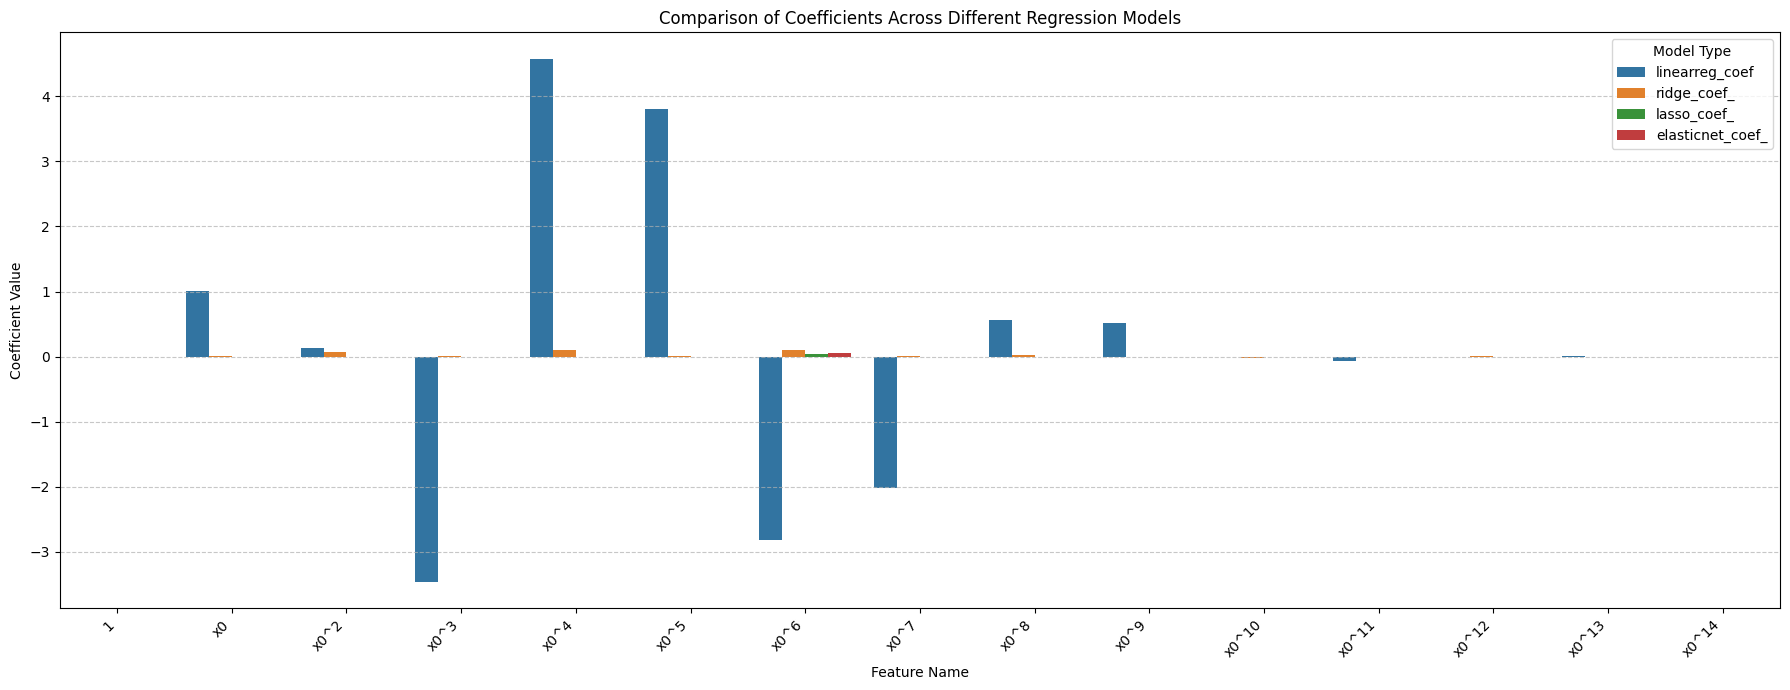

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns

df_coefs_melted = df_coefs.melt(id_vars='feature_name', var_name='model_type', value_name='coefficient')

plt.figure(figsize=(18, 7))
sns.barplot(x='feature_name', y='coefficient', hue='model_type', data=df_coefs_melted)
plt.title('Comparison of Coefficients Across Different Regression Models')
plt.xlabel('Feature Name')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

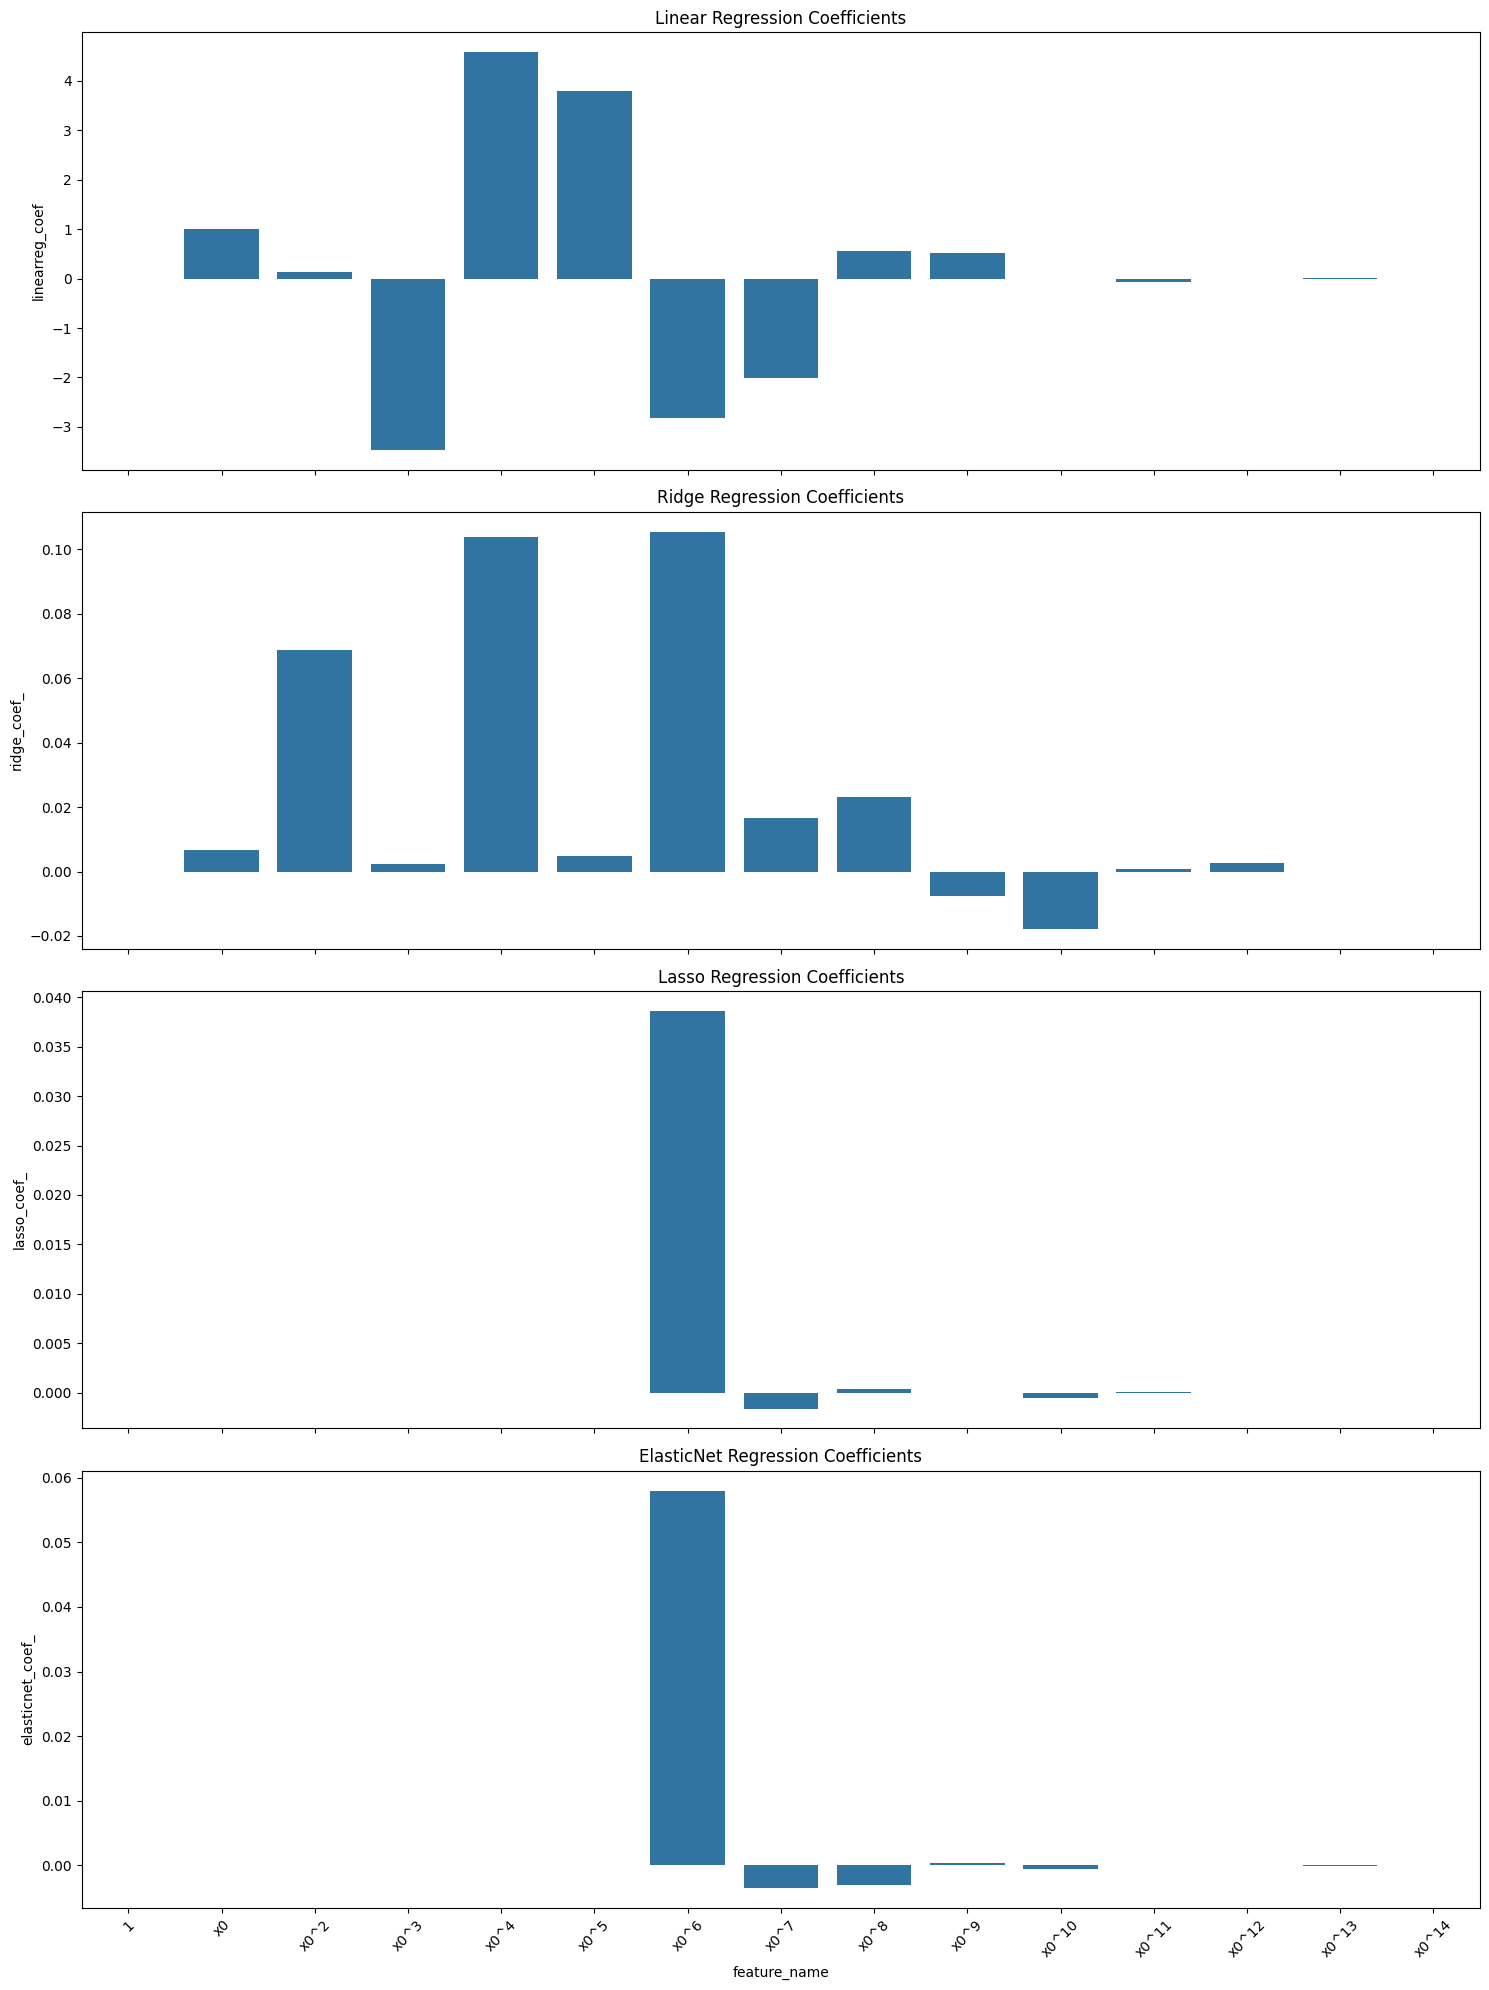

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

df_coefs = pd.DataFrame({'feature_name':feature_name, 'linearreg_coef':linearreg_coef, 'ridge_coef_':ridge_coef_, 'lasso_coef_':lasso_coef_, 'elasticnet_coef_':elasticnet_coef_})

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20), sharex=True)

sns.barplot(x='feature_name', y='linearreg_coef', data=df_coefs, ax=axes[0])
axes[0].set_title('Linear Regression Coefficients')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='feature_name', y='ridge_coef_', data=df_coefs, ax=axes[1])
axes[1].set_title('Ridge Regression Coefficients')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x='feature_name', y='lasso_coef_', data=df_coefs, ax=axes[2])
axes[2].set_title('Lasso Regression Coefficients')
axes[2].tick_params(axis='x', rotation=45)

sns.barplot(x='feature_name', y='elasticnet_coef_', data=df_coefs, ax=axes[3])
axes[3].set_title('ElasticNet Regression Coefficients')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()